# Homework6

**Enter your Name:**  Thomas Lu
    
** Enter your PID:**  thomaslu
    
I have neither given nor received unauthorized assistance on this assignment.

In [1]:
# Run this cell first.  Do NOT edit this cell.
Answer1 = Answer2 = Answer3a = Answer3b = Answer4 = Answer5 = dist = None
import pandas
import numpy
import matplotlib
import matplotlib.pyplot
import types
import nose.tools
#%matplotlib notebook
%matplotlib inline
table = pandas.read_csv('Survey-3654-Fall2018-clean.csv') 
nose.tools.assert_almost_equal(table.Height[27], 68.0, msg='You need to download the latest csv data file.')
table

,Name,Major,Year,Gender,YearsVT,Age,Height,DistanceBorn,BedTime,Pets,...,Spicy,Siblings,Camping,Football,Birthday,Programming,Math,Languages,HardDrive,Smoothies
0,bethel,Computational Modeling and Data Analytics,Junior,Female,2.0,19,62,400,11.0,70,...,55.0,1,0,2,327,80,80,2,8.000000e+09,50
1,Nikhil,Computer Science,Senior,Male,1.0,19,67,260,12.0,49,...,70.0,1,20,2,42,95,95,4,2.080000e+11,50
2,Thomas Lu,Computer Engineering,Senior,Male,2.0,21,70,320,12.5,50,...,50.0,1,0,7,206,75,80,4,1.000000e+09,80
3,Brian,Mathematics,Senior,Male,3.0,21,74,200,13.0,75,...,65.0,1,10,40,106,50,90,2,1.100000e+11,50
4,Nicole,Computational Modeling and Data Analytics,Junior,Female,1.0,20,64,242,11.0,85,...,1.0,3,2,0,137,90,50,2,1.043000e+11,80
5,Kai,Computational Modeling and Data Analytics,Junior,Male,2.0,22,76,7500,23.0,95,...,70.0,1,2,0,26,90,30,2,2.000000e+11,70
6,Tarun,Computational Modeling and Data Analytics,Junior,Male,3.0,19,67,8100,12.0,75,...,85.0,1,0,5,260,65,90,5,1.246910e+12,75
7,Alex,Computational Modeling and Data Analytics,Junior,Male,3.0,19,71,220,12.5,70,...,30.0,2,4,12,243,50,70,2,8.000000e+09,40
8,Hiba,Computational Modeling and Data Analytics,Senior,Female,4.0,22,66,7648,12.0,90,...,70.0,2,100,30,58,20,90,1,1.246910e+12,100
9,Dustin,Computational Modeling and Data Analytics,Sophomore,Male,1.0,19,74,65,12.0,80,...,1.0,1,1,3,139,100,50,4,3.320352e+07,1


**Problem 1.** Define a distance function, called *dist(i,j)*, that returns the L1 distance  between any two given students in the survey data. For quantitative columns, use z-score normalized data. For categorical columns, use the Hamming distance (0==same, 1==different). Do not include the Name column in the distance metric. You must write your own code for this metric, you cannot use a library method that computes distances.  Parameters i & j are indices of rows in the original table.

Using your distance function, compute the distance between the two people named "Jordan", and return the result as Answer1.

In [2]:
# Problem 1
# YOUR CODE HERE
#raise NotImplementedError()
norm = table.copy()
norm.iloc[:,4:] = (table.iloc[:,4:] - table.mean()) / table.std()
torg = norm.iloc[:,4:]
categ = table.iloc[:,1:4]

def dist(i,j):
    qsum = (torg.loc[i] - torg.loc[j]).abs().sum()
    csum = (categ.loc[i] != categ.loc[j]).sum()
    return csum + qsum
Answer1 = dist(29,50)

In [3]:
# autograder -- run me
nose.tools.assert_is_instance(Answer1, float)
nose.tools.assert_almost_equal(Answer1, 35.0685394869388, delta=0.00001)
nose.tools.assert_is_instance(dist, types.FunctionType)
Grade1a = [0.0, 25.657456527309165, 20.083321186551014, 30.316334224791614, 24.300269422942687, 31.105310865705036, 24.839180345227113, 25.839525357805787, 44.7649313306534, 33.48610354137483, 19.87793454536993, 36.34802627756752, 32.18274777213824, 23.81893803079349, 24.154279374899595, 31.59744752098427, 23.16635224250336, 28.40915889444504, 28.664399875477137, 27.494976119981825, 24.83937382679684, 27.106375766727165, 20.48738111485001, 27.00802748191912, 36.6636947430564, 21.65765170017126, 30.15483360141817, 29.351811816827915, 27.618618107736463, 33.276761870781634, 29.793177902128786, 22.021541468911362, 22.493857032434434, 35.559242815580376, 34.99456015483444, 31.404843448769693, 27.97040562070451, 32.738569819928145, 26.41987342240382, 29.227907477364962, 28.709668219983083, 29.538877586146462, 29.237008847110058, 18.041569226446214, 29.62712301734241, 24.997084367992837, 21.680224582705275, 27.922739571374883, 29.442193093481503, 30.234853212927028, 42.10643440720766, 27.79450430560432, 23.475157086340538, 24.578895050015287, 36.64906848312088, 31.96264276559767, 23.912652159094804, 26.343250175410333, 26.171181523030498, 31.80906855358906, 41.643591444984054, 29.299670963712092, 31.510240760893385, 19.675232064415408, 29.322815146986184, 27.60868329308855]
for i in range(66):
    nose.tools.assert_almost_equal(dist(i,i), 0.0, delta=0.00001)
    nose.tools.assert_almost_equal(dist(i,0), dist(0,i), delta=0.00001)
    nose.tools.assert_almost_equal(dist(i,0), Grade1a[i], delta=0.00001)
'passed'
# autograder hidden tests

'passed'

**Problem 2.** Compute the n x n distance matrix over all pairs of people in the survey, using your distance function from Problem 1. The matrix should be in the same row order as the data file. Represent the distance matrix as a pandas.DataFrame(dtype=float,...). You may need to consider the efficiency of your dist() solution.

Return the matrix as Answer2.

In [6]:
# Problem 2
# YOUR CODE HERE
#raise NotImplementedError()
#torg.index = table.Name
matrix = pandas.DataFrame(index=table.index, columns=table.index, dtype=float)
for i in range(len(table.index)):
    for j in range(i):
        matrix.iloc[i,j] = matrix.iloc[j,i] = \
        (categ.iloc[i] != categ.iloc[j]).sum() + (torg.iloc[i] - torg.iloc[j]).abs().sum()
Answer2 = pandas.DataFrame(matrix, dtype=float)
Answer2.replace(numpy.nan, 0, inplace=True)

In [7]:
# autograder -- run me
nose.tools.assert_is_instance(Answer2, pandas.DataFrame)
nose.tools.assert_tuple_equal(Answer2.shape, (66, 66))
for i in range(66):
    nose.tools.assert_almost_equal(Answer2.iloc[i,i], 0.0, delta=0.00001)
    nose.tools.assert_almost_equal(Answer2.iloc[i,0], Answer2.iloc[0,i], delta=0.00001)
    nose.tools.assert_almost_equal(Answer2.iloc[i,0], Grade1a[i], delta=0.00001)
'passed'
# autograder hidden tests

'passed'

**Problem 3.**  Who are the closest and farthest pairs of people? Hints: use NaN on the matrix diagonal to eliminate the 0 self distances from consideration; note the distinction between the min() and idxmin() functions. 

Return the result in variables:
* Answer3a = (name1, name2, distance) # closest pair, name1 > name2 (string comparison)
* Answer3b = (name1, name2, distance) # farthest pair, name1 > name2 (string comparison)

*Think & Try: Who is most like you?*

In [8]:
# Problem 3
# YOUR CODE HERE
#raise NotImplementedError()
tempvar = Answer2.copy()
tempvar.replace(0, numpy.nan, inplace=True)
temp1 = []
temp2 = []
temp3 = []
temp4 = []
for column in tempvar.columns:
    temp1.append(tempvar[column].idxmax())
    temp2.append(tempvar[column].idxmin())

maxnum = tempvar[temp1[0]][0]
for i in range(len(temp1)):
    if(maxnum > float(tempvar[temp1[i+1]][i+1])):
        maxnum = maxnum
    else:
        maxnum = tempvar[temp1[i+1]][i+1]
        maxindex = temp1[i]
    if(i == 64):
        break

minnum = tempvar[temp2[0]][0]
for i in range(len(temp2)):
    if(minnum < float(tempvar[temp2[i+1]][i+1])):
        minnum = minnum
    else:
        minnum = tempvar[temp2[i+1]][i+1]
        minindex = temp2[i]
    if(i == 64):
        break

temp3.append(table.Name[8])
temp3.append(table.Name[maxindex])
temp3.append(maxnum)
temp4.append(table.Name[13])
temp4.append(table.Name[minindex])
temp4.append(minnum)
Answer3a = temp4
Answer3b = temp3
(Answer3a, Answer3b)

(['Xavier', 'William', 14.859050357457665],
 ['Hiba', 'Dustin', 58.132218811110896])

In [9]:
# autograder -- run me
nose.tools.assert_equal(len(Answer3a), 3)
nose.tools.assert_equal(len(Answer3b), 3)
nose.tools.assert_is_instance(Answer3a[0], str)
nose.tools.assert_is_instance(Answer3a[1], str)
nose.tools.assert_is_instance(Answer3a[2], float)
nose.tools.assert_is_instance(Answer3b[0], str)
nose.tools.assert_is_instance(Answer3b[1], str)
nose.tools.assert_is_instance(Answer3b[2], float)
nose.tools.assert_greater(Answer3a[0], Answer3a[1])
nose.tools.assert_greater(Answer3b[0], Answer3b[1])
nose.tools.assert_less(Answer3a[2], Answer3b[2])
'passed'
# autograder hidden tests

'passed'

**Problem 4.** Who is most/least like everyone else, based on the mean of each person's distances to all others? Do not include the 0 self distances in the mean computations. Hint: Series.argsort() might be useful.

In Answer4, return a list of Names, sorted in order of nearness to everyone else, from nearest to farthest.

In [10]:
# Problem 4
# YOUR CODE HERE
#raise NotImplementedError()
lavery = Answer2.mean().tolist()
goodwin = numpy.argsort(lavery)
Answer4 = []
for i in goodwin:
    Answer4.append(table['Name'][i])
Answer4

['Thomas Lu',
 'William',
 'Caroline ',
 'Ben',
 'John Doe',
 'Xavier',
 'Tiffany Ma',
 'Amanda',
 'James',
 'Cody',
 'Menaal',
 'Dylan',
 'Pavani Surapaneni',
 'Deepak',
 'Louie',
 'bethel',
 'William (Bob)',
 'Armani McKinnie',
 'Thomas',
 'Akash',
 'Alex',
 'Mariam',
 'Tarun',
 'Josh',
 'Hector',
 'Bill',
 'Phillip',
 'Sahil',
 'Wanqian',
 'Spencer',
 'Brian',
 'Nicole',
 'Alec',
 'Nikhil',
 'Wenjia',
 'Danielle',
 'Benjamin',
 'Fuadul Islam',
 'Daniele',
 'Jack',
 'Jordan',
 'Palmer',
 'Jinyang',
 'Kyle',
 'Jon',
 'junyuan',
 'Yuxuan',
 'Kai',
 'Chris',
 'Abdelrahman',
 'Caroline',
 'Ian',
 'JINGYI',
 'Yunfeng',
 'Samarth',
 'Madelaine',
 'Jacob',
 'Peter',
 'Dustin',
 'Danielle',
 'Sagar',
 'Lenz',
 'Deniz Atak',
 'Jordan',
 'Hiba',
 'Youssef Saleh']

In [11]:
# autograder -- run me
nose.tools.assert_is_instance(Answer4, list)
nose.tools.assert_equal(len(Answer4), 66)
nose.tools.assert_equal(list(Answer4)[0], 'Thomas Lu')
nose.tools.assert_equal(list(Answer4)[-1], 'Youssef Saleh')
'passed'
# autograder hidden tests

'passed'

**Problem 5.** Visualize the distribution of all n^2 distances, including the 0 self distances, as an appropriately labeled KDE plot. Hint: flatten() might be useful. Where is the peak of the most dense portion of the distribtion? Hint: find the plot's curve data in Axes.lines\[0\].get_xydata( ) or similar, or use the chart in interactive mode to probe the position.

Show the plot here, and return the distance value corresponding to the KDE peak in Answer5.

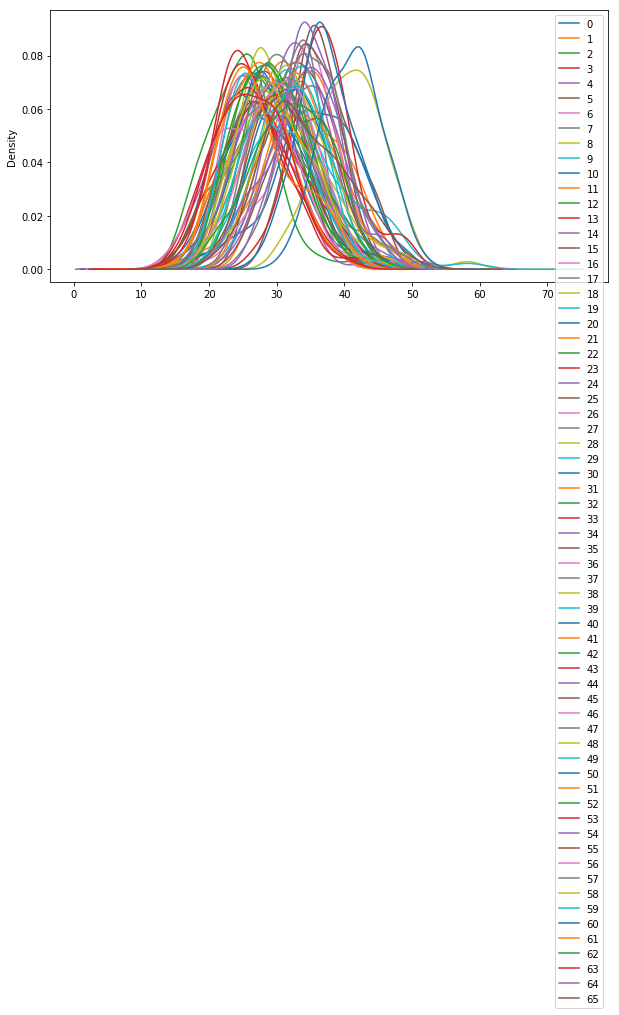

In [12]:
# Problem 5
# YOUR CODE HERE
#raise NotImplementedError()
#Answer5
tempvar.plot.kde(figsize=(10,5))

In [18]:
# autograder -- run me
nose.tools.assert_is_instance(Answer5, (int, float))
nose.tools.assert_greater_equal(Answer5, 20)
nose.tools.assert_less_equal(Answer5, 50)
'passed'
# autograder hidden tests

AssertionError: None is not an instance of (<class 'int'>, <class 'float'>)

In [ ]:
# scratch space
